<a href="https://colab.research.google.com/github/syedsadabalam/oasisinfobyte/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction Task-3**

---



---


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import plotly.express as px


In [ ]:
cardata = pd.read_csv('/content/drive/MyDrive/ColabNotebook/car data.csv')

In [ ]:
cardata

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
cardata.shape

(301, 9)

In [ ]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#check catogorical data
cardata.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
cardata.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [ ]:
cardata.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
#encoding the catogorical data
cardata.replace({'Fuel_Type':{'Petrol':3, 'Diesel':2, 'CNG':0}} , inplace=True)
cardata.replace({'Selling_type':{'Dealer':0, 'Individual':1}} ,inplace=True)
cardata.replace({'Transmission':{'Automatic':0, 'Manual':1}} ,inplace=True)

In [ ]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,3,0,1,0
1,sx4,2013,4.75,9.54,43000,2,0,1,0
2,ciaz,2017,7.25,9.85,6900,3,0,1,0
3,wagon r,2011,2.85,4.15,5200,3,0,1,0
4,swift,2014,4.60,6.87,42450,2,0,1,0


In [ ]:
x = cardata.drop(['Car_Name','Selling_Price'],axis=1)
y = cardata['Selling_Price']

In [ ]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,3,0,1,0
1,2013,9.54,43000,2,0,1,0
2,2017,9.85,6900,3,0,1,0
3,2011,4.15,5200,3,0,1,0
4,2014,6.87,42450,2,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,2,0,1,0
297,2015,5.90,60000,3,0,1,0
298,2009,11.00,87934,3,0,1,0
299,2017,12.50,9000,2,0,1,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=2)

In [ ]:
lr_model =LinearRegression()

In [ ]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
train_data_predict = lr_model.predict(x_train)

In [ ]:
error_score = metrics.r2_score(y_train, train_data_predict)
print('R squared error:', error_score)

R squared error: 0.933806185068958


Text(0.5, 1.0, 'Actual price VS Predicted price')

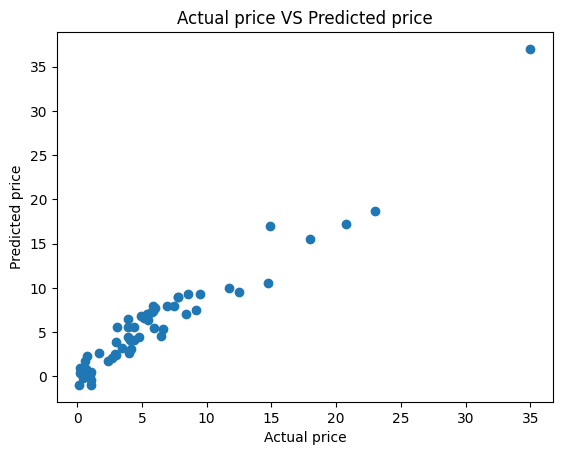

In [ ]:
plt.scatter(y_train, train_data_predict)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price VS Predicted price')